# Business Case
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

* Also, determine the optimal value of lambda for ridge and lasso regression.


# Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Import Essential Packages 

In [1]:
#Import necessary python libraries
import numpy as np #algebric computations
import pandas as pd #data processing/handling
import matplotlib.pyplot as plt # data visualization

import seaborn as sns #for visualization

%matplotlib inline 

import sklearn
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings #need to suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Data Understanding & Preparation

## 1.1 Let's load the data and handle missing values

In [2]:
housing_base_data = pd.read_csv('train.csv')

In [3]:
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1.2 Understanding data and taking quality measures

In [5]:
#let's analyze 'MSZoning'; based on data dictionary let's convert it as categorical variable
housing_base_data['MSZoning'] = housing_base_data['MSZoning'].astype('category')

In [6]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

In [7]:
#let's analyze 'Street' column
housing_base_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [8]:
#let's convert 'Street' as Categorical variable
housing_base_data['Street'] = housing_base_data['Street'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

In [9]:
#let's analyze 'Alley' column
housing_base_data['Alley'].isna().sum()

1369

### Observation
* About 84% of entries has NA

### Missing Value Handling
* let's drop the column 'Alley'


In [10]:
housing_base_data = housing_base_data.drop(columns='Alley', axis=1)
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [12]:
# let's analyze 'LotShape'
housing_base_data['LotShape'].isna().sum()

0

In [13]:
housing_base_data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [14]:
# let's convert 'LotShape' as Categorical variable
housing_base_data['LotShape'] = housing_base_data['LotShape'].astype('category')

In [15]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [16]:
# let's analyze LandContour
housing_base_data['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [17]:
#let's convert 'LandContour' as Categorical Variable
housing_base_data['LandContour'] = housing_base_data['LandContour'].astype('category')

In [18]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [19]:
#let's analyze 'Utilities'
housing_base_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### Observation 
* All entries has same value except 1
### Data Handling
* Let's drop this column as it may not bring much of difference due to similar values for all training set

In [20]:
# let's drop column 'Utilities'
housing_base_data = housing_base_data.drop(columns='Utilities', axis=1)
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [22]:
# let's analyze column 'LotConfig'
housing_base_data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [23]:
#let's convert column 'LotConfig' as Categorical variable
housing_base_data['LotConfig'] = housing_base_data['LotConfig'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [24]:
# let's analyze column 'LandSlope'
housing_base_data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [25]:
#let's convert column 'LandSlope' as Categorical variable
housing_base_data['LandSlope'] = housing_base_data['LandSlope'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [26]:
#let's analyze column 'Neighborhood'
housing_base_data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [27]:
# let's convert column 'Neighborhood' as Categorical variable
housing_base_data['Neighborhood'] = housing_base_data['Neighborhood'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [28]:
# let's analyze column 'Condition1'
housing_base_data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [29]:
# let's convert column 'Condition1' as Categorical variable
housing_base_data['Condition1'] = housing_base_data['Condition1'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [30]:
# let's analyze column 'Condition2'
housing_base_data['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

### Observation 
* Values for columns 'Condition1' and 'Condition2' are similar
* Distribution of values are not similar; there is likely chance of inconsistent data
* also it seems 86% & above has same value viz. "Norm"
### Data handling
* Let's drop this column since there is no much variance in data here

In [31]:
housing_base_data = housing_base_data.drop(columns=['Condition1', 'Condition2'], axis=1)
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  BldgType       1460 non-null   object  
 12  HouseStyle     1460 non-null   object  
 13  OverallQual    1460 non-null   int64   
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

In [33]:
housing_base_data['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [34]:
housing_base_data['BldgType'] = housing_base_data['BldgType'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   object  
 13  OverallQual    1460 non-null   int64   
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

In [35]:
# let's analyze column 'HouseStyle'
housing_base_data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [36]:
# let's convert column 'HouseStyle' as Categorical variable
housing_base_data['HouseStyle'] = housing_base_data['HouseStyle'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  OverallQual    1460 non-null   int64   
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

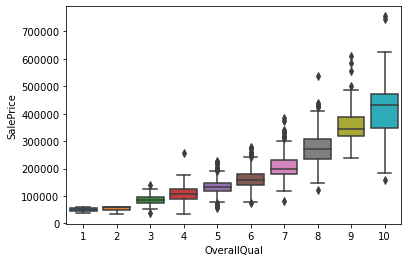

In [37]:
#let's analyze column 'OverallQual' and relationship with "SalePrice"
sns.boxplot(data=housing_base_data, x=housing_base_data['OverallQual'], y='SalePrice')

### Observation
* Column 'OverallQual' is an ordered categorical data type
### Data Handling
* Let's create an ordered categorical variable 

In [38]:
from pandas.api.types import CategoricalDtype

In [39]:
housing_base_data['OverallQual'] = housing_base_data['OverallQual'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  OverallQual    1460 non-null   category
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

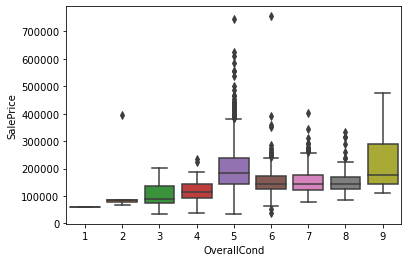

In [40]:
# let's analyze column 'OverallCond'
sns.boxplot(data=housing_base_data, x=housing_base_data['OverallCond'], y='SalePrice')

### Observation
* Median SalePrice has irregular pattern with ordered column 'OverallCond
### Data Handling
* let's convert column 'OverallCond' as Categorical variable for now

In [41]:
housing_base_data['OverallCond'] = housing_base_data['OverallCond'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  OverallQual    1460 non-null   category
 14  OverallCond    1460 non-null   category
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

In [42]:
# let's analyze column 'YearBuilt'
housing_base_data['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

### Observation
* Column 'YearBuilt' provide year of built; this may not have much meaning
### Data Handling
* Let's create a new variable 'house-age' which shall make more sense for analyzing price variation against age of building

In [43]:
# let's import date class from datetime module
from datetime import date
today_date = date.today()
housing_base_data['house-age'] = date.today().year - housing_base_data['YearBuilt']
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,19
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,46
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,21
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,107
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,22


In [44]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  OverallQual    1460 non-null   category
 14  OverallCond    1460 non-null   category
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

In [45]:
#let's analyze column 'YearRemodAdd' for any recent changes done
housing_base_data['last-modified-aging'] = housing_base_data['YearRemodAdd'] - housing_base_data['YearBuilt']
housing_base_data['last-modified-aging']

0        0
1        0
2        1
3       55
4        0
        ..
1455     1
1456    10
1457    65
1458    46
1459     0
Name: last-modified-aging, Length: 1460, dtype: int64

In [46]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  YearBuilt            

In [47]:
#since we have created new variable based on 'YearBuilt' & 'YearRemodAdd'; let's drop these two columns
housing_base_data = housing_base_data.drop(columns=['YearBuilt','YearRemodAdd'], axis=1)
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,NaN,NaN,0,2,2008,WD,Normal,208500,19,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,NaN,NaN,0,5,2007,WD,Normal,181500,46,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,NaN,NaN,0,9,2008,WD,Normal,223500,21,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,107,55
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,NaN,NaN,0,12,2008,WD,Normal,250000,22,0


In [48]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [49]:
#let's analyze column 'RoofStyle'
housing_base_data['RoofStyle']

0       Gable
1       Gable
2       Gable
3       Gable
4       Gable
        ...  
1455    Gable
1456    Gable
1457    Gable
1458      Hip
1459    Gable
Name: RoofStyle, Length: 1460, dtype: object

In [50]:
housing_base_data['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [51]:
#let's convert column 'RoofStyle' as Categorical variable
housing_base_data['RoofStyle'] = housing_base_data['RoofStyle'].astype('category')

In [52]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [53]:
# let's analyze column 'RoofMatl'
housing_base_data['RoofMatl']

0       CompShg
1       CompShg
2       CompShg
3       CompShg
4       CompShg
         ...   
1455    CompShg
1456    CompShg
1457    CompShg
1458    CompShg
1459    CompShg
Name: RoofMatl, Length: 1460, dtype: object

In [54]:
housing_base_data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [55]:
#let's convert 'RoofMatl' as Categorical variable
housing_base_data['RoofMatl'] = housing_base_data['RoofMatl'].astype('category')

In [56]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [57]:
#let's analyze column 'Exterior1st'
housing_base_data['Exterior1st']

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CemntBd
1458    MetalSd
1459    HdBoard
Name: Exterior1st, Length: 1460, dtype: object

In [58]:
housing_base_data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [59]:
housing_base_data['Exterior1st'] = housing_base_data['Exterior1st'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [60]:
housing_base_data['Exterior2nd']

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Shng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CmentBd
1458    MetalSd
1459    HdBoard
Name: Exterior2nd, Length: 1460, dtype: object

In [61]:
housing_base_data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [62]:
#let's convert column 'Exterior2nd' as Categorical variable
housing_base_data['Exterior2nd'] = housing_base_data['Exterior2nd'].astype('category')

In [63]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [64]:
#let's analyze column 'MasVnrType'
housing_base_data['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [65]:
housing_base_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [66]:
#let's convert column 'MasVnrType' as Categorical variable
housing_base_data['MasVnrType'] = housing_base_data['MasVnrType'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [67]:
housing_base_data['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [68]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [69]:
housing_base_data['ExterQual']

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

In [70]:
housing_base_data['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [71]:
#let's convert column 'ExterQual' as Categorical variable
housing_base_data['ExterQual'] = housing_base_data['ExterQual'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [72]:
#let's analyze column 'ExterCond'
housing_base_data['ExterCond']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: ExterCond, Length: 1460, dtype: object

In [73]:
housing_base_data['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [74]:
#let's convert column 'ExterCond' as Categorical variable
housing_base_data['ExterCond'] = housing_base_data['ExterCond'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [75]:
#let's analyze column 'Foundation'
housing_base_data['Foundation']

0        PConc
1       CBlock
2        PConc
3       BrkTil
4        PConc
         ...  
1455     PConc
1456    CBlock
1457     Stone
1458    CBlock
1459    CBlock
Name: Foundation, Length: 1460, dtype: object

In [76]:
housing_base_data['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [77]:
#let's convert column 'Foundation' as Categorical variable
housing_base_data['Foundation'] = housing_base_data['Foundation'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [78]:
#let's analyze column 'BsmtQual'
housing_base_data['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [79]:
#lets' convert column 'BsmtQual' as Categorical variable
housing_base_data['BsmtQual'] = housing_base_data['BsmtQual'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [80]:
#let's analyze column 'ExterQual'
housing_base_data['ExterQual']

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: category
Categories (4, object): ['Ex', 'Fa', 'Gd', 'TA']

In [81]:
#let's convert column 'ExterQual' as Categorical variable
housing_base_data['ExterQual'] = housing_base_data['ExterQual'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [82]:
#let's analyze column 'BsmtCond'
housing_base_data['BsmtCond']

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object

In [83]:
housing_base_data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [84]:
#let's convert column 'BsmtCond' as Categorical variable
housing_base_data['BsmtCond'] = housing_base_data['BsmtCond'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [85]:
#let's analyze column 'BsmtExposure'
housing_base_data['BsmtExposure']

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object

In [86]:
housing_base_data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [87]:
# let's convert column 'BsmtExposure' as Categorical variable
housing_base_data['BsmtExposure'] = housing_base_data['BsmtExposure'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [88]:
# let's analyze column 'BsmtFinType1'
housing_base_data['BsmtFinType1']

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object

In [89]:
housing_base_data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [90]:
#let's convert column 'BsmtFinType1' as Categorical Variable
housing_base_data['BsmtFinType1'] = housing_base_data['BsmtFinType1'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [91]:
#let's analyze column 'BsmtFinType2'
housing_base_data['BsmtFinType2']

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

In [92]:
housing_base_data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [93]:
#let's convert column 'BsmtFinType2' as Categorical variable
housing_base_data['BsmtFinType2'] = housing_base_data['BsmtFinType2'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [94]:
#let's analyze column 'Heating'
housing_base_data['Heating']

0       GasA
1       GasA
2       GasA
3       GasA
4       GasA
        ... 
1455    GasA
1456    GasA
1457    GasA
1458    GasA
1459    GasA
Name: Heating, Length: 1460, dtype: object

In [95]:
housing_base_data['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [96]:
#let's convert column 'Heating' as categorical variable
housing_base_data['Heating'] = housing_base_data['Heating'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [97]:
#let's analyze column 'HeatingQC'
housing_base_data['HeatingQC']

0       Ex
1       Ex
2       Ex
3       Gd
4       Ex
        ..
1455    Ex
1456    TA
1457    Ex
1458    Gd
1459    Gd
Name: HeatingQC, Length: 1460, dtype: object

In [98]:
housing_base_data['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [99]:
#let's convert column 'HeatingQC' as Categorical variable
housing_base_data['HeatingQC'] = housing_base_data['HeatingQC'].astype('category')

In [100]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [101]:
#let's analyze column 'CentralAir
housing_base_data['CentralAir']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object

In [102]:
#let's add new feature to manage this column
housing_base_data['CentralAir-alt'] = housing_base_data['CentralAir'].apply(lambda x: 1 if(x=='Y') else 0)
housing_base_data['CentralAir-alt']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir-alt, Length: 1460, dtype: int64

In [103]:
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging,CentralAir-alt
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,NaN,0,2,2008,WD,Normal,208500,19,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,NaN,0,5,2007,WD,Normal,181500,46,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,NaN,0,9,2008,WD,Normal,223500,21,1,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,NaN,0,2,2006,WD,Abnorml,140000,107,55,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,NaN,0,12,2008,WD,Normal,250000,22,0,1


In [104]:
#let's drop original column 'CentralAir' as we created a dummay variable already
housing_base_data = housing_base_data.drop(columns='CentralAir', axis=1)
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging,CentralAir-alt
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,NaN,0,2,2008,WD,Normal,208500,19,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,NaN,0,5,2007,WD,Normal,181500,46,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,NaN,0,9,2008,WD,Normal,223500,21,1,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,NaN,0,2,2006,WD,Abnorml,140000,107,55,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,NaN,0,12,2008,WD,Normal,250000,22,0,1


In [105]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [106]:
# let's analyze column 'Electrical'
housing_base_data['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [107]:
housing_base_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [108]:
#let's convert column 'Electrical' as Categorical variable
housing_base_data['Electrical'] = housing_base_data['Electrical'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [109]:
#let's analyze column 'KitchenQual'
housing_base_data['KitchenQual']

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    TA
Name: KitchenQual, Length: 1460, dtype: object

In [110]:
housing_base_data['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [111]:
#let's convert column 'KitchenQual' as Categorical variable
housing_base_data['KitchenQual'] = housing_base_data['KitchenQual'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [112]:
#let's analyze column 'Functional'
housing_base_data['Functional']

0        Typ
1        Typ
2        Typ
3        Typ
4        Typ
        ... 
1455     Typ
1456    Min1
1457     Typ
1458     Typ
1459     Typ
Name: Functional, Length: 1460, dtype: object

In [113]:
housing_base_data['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [114]:
#let's convert column 'Functional' as Categorical Variable
housing_base_data['Functional'] = housing_base_data['Functional'].astype('category')

In [115]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [116]:
#let's analyze column 'FireplaceQu'
housing_base_data['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [117]:
housing_base_data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [118]:
#let's convert column 'FireplaceQu' as Categocial variable
housing_base_data['FireplaceQu'] = housing_base_data['FireplaceQu'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [119]:
#let's analyze column 'GarageType'
housing_base_data['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [120]:
housing_base_data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [121]:
#let's convert column 'GarageType' as Categorical variable
housing_base_data['GarageType'] = housing_base_data['GarageType'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [122]:
#let's analyze the column 'GarageFinish'
housing_base_data['GarageFinish']

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [123]:
housing_base_data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [124]:
#let's convert column 'GarageFinish' as Categorical variable
housing_base_data['GarageFinish'] = housing_base_data['GarageFinish'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [125]:
# Let's analyze column 'GarageQual'
housing_base_data['GarageQual']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object

In [126]:
housing_base_data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [127]:
#let's convert column 'GarageQual' as Categorical variable
housing_base_data['GarageQual'] = housing_base_data['GarageQual'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [128]:
#let's analyze column 'PoolQC'
housing_base_data['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [129]:
housing_base_data['PoolQC'].isna().sum()

1453

### observation
* Most of the values are <b>'NaN'</b>

### Data handling
* let's drop this column 

In [130]:
housing_base_data = housing_base_data.drop(columns='PoolQC', axis=1)
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging,CentralAir-alt
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,NaN,0,2,2008,WD,Normal,208500,19,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,NaN,0,5,2007,WD,Normal,181500,46,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,NaN,0,9,2008,WD,Normal,223500,21,1,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,NaN,0,2,2006,WD,Abnorml,140000,107,55,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,NaN,0,12,2008,WD,Normal,250000,22,0,1


In [131]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [132]:
#let's analyze column 'Fence'
housing_base_data['Fence']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object

In [133]:
housing_base_data['Fence'].isna().sum()

1179

### Observation
* 1179 out of 1260 are missing values which is approximately about 94%

### Data handling
* let's drop this column

In [134]:
housing_base_data = housing_base_data.drop(columns='Fence', axis=1)
housing_base_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging,CentralAir-alt
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,NaN,0,2,2008,WD,Normal,208500,19,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,NaN,0,5,2007,WD,Normal,181500,46,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,NaN,0,9,2008,WD,Normal,223500,21,1,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,NaN,0,2,2006,WD,Abnorml,140000,107,55,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,NaN,0,12,2008,WD,Normal,250000,22,0,1


In [135]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [136]:
#let's analyze column 'GarageCond'
housing_base_data['GarageCond']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

In [137]:
housing_base_data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [138]:
#let's convert column 'GarageCond' as Categorical variable
housing_base_data['GarageCond'] = housing_base_data['GarageCond'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [139]:
#let's analyze column 'PavedDrive'
housing_base_data['PavedDrive']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: PavedDrive, Length: 1460, dtype: object

In [140]:
housing_base_data['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [141]:
#let's convert column 'PavedDrive' as Categorical variable
housing_base_data['PavedDrive'] = housing_base_data['PavedDrive'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [142]:
#let's analyze column 'MiscFeature'
housing_base_data['MiscFeature']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1455     NaN
1456     NaN
1457    Shed
1458     NaN
1459     NaN
Name: MiscFeature, Length: 1460, dtype: object

In [143]:
housing_base_data['MiscFeature'].isna().sum()

1406

### Observation
* 1406 out 1460 data points are missing which is approximately about 96% of data

### Data Handling Action
* let's drop this column

In [144]:
housing_base_data = housing_base_data.drop(columns='MiscFeature', axis=1)
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [145]:
#let's analyze column 'SaleType'
housing_base_data['SaleType']

0       WD
1       WD
2       WD
3       WD
4       WD
        ..
1455    WD
1456    WD
1457    WD
1458    WD
1459    WD
Name: SaleType, Length: 1460, dtype: object

In [146]:
housing_base_data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [147]:
#let's convert the column 'SaleType' as categorical variable
housing_base_data['SaleType'] = housing_base_data['SaleType'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [148]:
#let's analyze the column 'SaleCondition'
housing_base_data['SaleCondition']

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object

In [149]:
housing_base_data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [150]:
housing_base_data['SaleCondition'] = housing_base_data['SaleCondition'].astype('category')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1201 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   LotShape             1460 non-null   category
 7   LandContour          1460 non-null   category
 8   LotConfig            1460 non-null   category
 9   LandSlope            1460 non-null   category
 10  Neighborhood         1460 non-null   category
 11  BldgType             1460 non-null   category
 12  HouseStyle           1460 non-null   category
 13  OverallQual          1460 non-null   category
 14  OverallCond          1460 non-null   category
 15  RoofStyle            

In [151]:
#let's analyze column 'Id'
housing_base_data['Id']

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [152]:
#since 'Id' is only identifier for each data entry; we can drop it
housing_base_data = housing_base_data.drop(columns='Id', axis=1)
housing_base_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging,CentralAir-alt
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,2,2008,WD,Normal,208500,19,0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,5,2007,WD,Normal,181500,46,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,9,2008,WD,Normal,223500,21,1,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,2,2006,WD,Abnorml,140000,107,55,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,12,2008,WD,Normal,250000,22,0,1


In [153]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1460 non-null   int64   
 1   MSZoning             1460 non-null   category
 2   LotFrontage          1201 non-null   float64 
 3   LotArea              1460 non-null   int64   
 4   Street               1460 non-null   category
 5   LotShape             1460 non-null   category
 6   LandContour          1460 non-null   category
 7   LotConfig            1460 non-null   category
 8   LandSlope            1460 non-null   category
 9   Neighborhood         1460 non-null   category
 10  BldgType             1460 non-null   category
 11  HouseStyle           1460 non-null   category
 12  OverallQual          1460 non-null   category
 13  OverallCond          1460 non-null   category
 14  RoofStyle            1460 non-null   category
 15  RoofMatl             

## 1.3 Analyze missing values and take correction measures

In [154]:
# let's analyze column 'MasVnrType'
housing_base_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

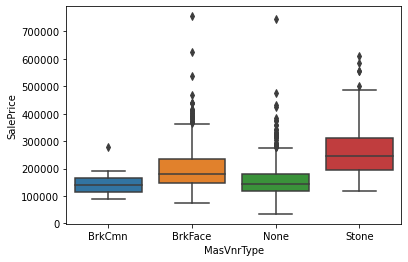

In [155]:
#let's understand relationship b/w 'MasVnrType' and target feature 'SalePrice'
sns.boxplot(data=housing_base_data, x='MasVnrType', y='SalePrice')

### Observation
* Median price of 'BrkCmn' and 'None' are similar
### Imputation technique
* Let's replace None with BrkCmn

In [156]:
housing_base_data['MasVnrType'] = housing_base_data['MasVnrType'].apply(lambda x: 'BrkCmn' if (x=='None') else x)

In [157]:
housing_base_data['MasVnrType'] = housing_base_data['MasVnrType'].astype('category')

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

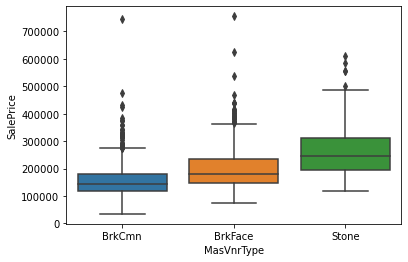

In [158]:
sns.boxplot(data=housing_base_data, x='MasVnrType', y='SalePrice')

In [159]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1460 non-null   int64   
 1   MSZoning             1460 non-null   category
 2   LotFrontage          1201 non-null   float64 
 3   LotArea              1460 non-null   int64   
 4   Street               1460 non-null   category
 5   LotShape             1460 non-null   category
 6   LandContour          1460 non-null   category
 7   LotConfig            1460 non-null   category
 8   LandSlope            1460 non-null   category
 9   Neighborhood         1460 non-null   category
 10  BldgType             1460 non-null   category
 11  HouseStyle           1460 non-null   category
 12  OverallQual          1460 non-null   category
 13  OverallCond          1460 non-null   category
 14  RoofStyle            1460 non-null   category
 15  RoofMatl             

In [160]:
housing_base_data['MasVnrType'].value_counts()

BrkCmn     879
BrkFace    445
Stone      128
Name: MasVnrType, dtype: int64

In [161]:
housing_base_data['MasVnrType'].isna().sum()

8

### Observation
* 8 values are missing for features 'MasVnrType' and 'MasVnrArea'
* Missing values are less than 1% of total data

### Data Handling action
* Let's remove the entries with missing values

In [162]:
housing_base_data = housing_base_data[~(housing_base_data['MasVnrType'].isna())]

In [163]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [164]:
#let's analyze column 'BsmtQual' for missing values
housing_base_data[(housing_base_data['BsmtQual'].isna())]['BsmtQual']

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtQual, dtype: category
Categories (4, object): ['Ex', 'Fa', 'Gd', 'TA']

In [165]:
# For feature 'BsmtQual' NA means "No basement";  let's refill all NA with 'No-Basement'
housing_base_data['BsmtQual'] = housing_base_data['BsmtQual'].cat.add_categories('No-Basement').fillna('No-Basement')

In [166]:
housing_base_data['BsmtQual'].value_counts()

TA             648
Gd             612
Ex             120
No-Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [167]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

### Observation
* NA for feature 'BsmtCond' means "No Basement" as per data dictionay

### Data Handling action
* let's replance NA with 'No-Basement' categorival value

In [168]:
housing_base_data['BsmtCond'] = housing_base_data['BsmtCond'].cat.add_categories('No-Basement').fillna('No-Basement')

In [169]:
housing_base_data['BsmtCond'].value_counts()

TA             1304
Gd               64
Fa               45
No-Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [170]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

### Observtion
* NA for feature 'BsmtExposure' means No basement as per data dictionary

### Data Handling action
* let's replace NA with 'No-Basement' category

In [171]:
housing_base_data['BsmtExposure'] = housing_base_data['BsmtExposure'].cat.add_categories('No-Basement').fillna('No-Basement')
housing_base_data['BsmtExposure'].value_counts()

No             946
Av             221
Gd             133
Mn             114
No-Basement     38
Name: BsmtExposure, dtype: int64

In [172]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

### Observation
* NA for feature 'BsmtFinType1' meanse No Basement
### Data Handling
* let's refill na with new category 'No-Basement'

In [173]:
housing_base_data['BsmtFinType1'] = housing_base_data['BsmtFinType1'].cat.add_categories('No-Basement').fillna('No-Basement')
housing_base_data['BsmtFinType1'].value_counts()

Unf            428
GLQ            413
ALQ            220
BLQ            148
Rec            132
LwQ             74
No-Basement     37
Name: BsmtFinType1, dtype: int64

In [174]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

### Observation
* NA for feature 'BsmtFinType2' means No Basement as per data dictionary
### Data handling action
* Let's fill NA with 'No-Basement' categorical value

In [175]:
housing_base_data['BsmtFinType2'] = housing_base_data['BsmtFinType2'].cat.add_categories('No-Basement').fillna('No-Basement')
housing_base_data['BsmtFinType2'].value_counts()

Unf            1248
Rec              54
LwQ              46
No-Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [176]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [177]:
housing_base_data[(housing_base_data['FireplaceQu'].isna())]['FireplaceQu']

0       NaN
5       NaN
10      NaN
12      NaN
15      NaN
       ... 
1452    NaN
1453    NaN
1454    NaN
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 686, dtype: category
Categories (5, object): ['Ex', 'Fa', 'Gd', 'Po', 'TA']

### Observation
* NA for feature 'FireplaceQu' means No Fireplace as per data dictionary
### Data Handling
* Let's fill all NA with 'No Fireplace' categorical value

In [178]:
housing_base_data['FireplaceQu'] = housing_base_data['FireplaceQu'].cat.add_categories('No-Fireplace').fillna('No-Fireplace')
housing_base_data['FireplaceQu'].value_counts()

No-Fireplace    686
Gd              378
TA              311
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [179]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [180]:
#let's analyze missing value for feature 'Electrical'
housing_base_data[(housing_base_data['Electrical'].isna())]['Electrical']

1379    NaN
Name: Electrical, dtype: category
Categories (5, object): ['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr']

In [181]:
housing_base_data['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Observation
* SBrkr is the most repeated value
### Data Handling action
* let's fill NA with 'SBrkr'

In [182]:
housing_base_data['Electrical'] = housing_base_data['Electrical'].fillna('SBrkr')

In [183]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [184]:
# let's analyze missing values for feature 'GarageType'
housing_base_data[(housing_base_data['GarageType'].isna())]['GarageType']

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
       ... 
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageType, Length: 81, dtype: category
Categories (6, object): ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd']

### Observation
* NA means "No Garage" for feature 'GarageType'

### Data Handling Action
* Let's replace NA with 'No-Garage' categorical value

In [185]:
housing_base_data['GarageType'] = housing_base_data['GarageType'].cat.add_categories('No-Garage').fillna('No-Garage')
housing_base_data['GarageType'].value_counts()

Attchd       863
Detchd       387
BuiltIn       87
No-Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [186]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [187]:
#let's analyze missing values for 'GarageYrBlt'
housing_base_data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1452, dtype: float64

### Observation
* Year of built is more useful for finding age of Garage

### Data Handling Method
* Let's create new variable for "Garage-Age"
* Then drop the original feature 'GarageYrBlt'

In [188]:
housing_base_data['Garage-Age'] = housing_base_data['GarageYrBlt'].apply(lambda x: date.today().year - x)
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [189]:
#let's drop 'GarageYrBlt'
housing_base_data = housing_base_data.drop(columns='GarageYrBlt', axis=1)
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [190]:
#let's repalce missing value of feature 'GarageFinish' with 'No-Garage' Categorical value as explained by Data Dictionary
housing_base_data['GarageFinish'] = housing_base_data['GarageFinish'].cat.add_categories('No-Garage').fillna('No-Garage')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

### Observation
* Based on Data diction feature 'GarageQual' and 'GarageCond' shall have NA record for "No Garage"

### Data Handling Method
* Let's fillna with "No-Garage" categorical variable

In [191]:
housing_base_data['GarageQual'] = housing_base_data['GarageQual'].cat.add_categories('No-Garage').fillna('No-Garage')
housing_base_data['GarageCond'] = housing_base_data['GarageCond'].cat.add_categories('No-Garage').fillna('No-Garage')
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

<AxesSubplot:xlabel='Garage-Age', ylabel='SalePrice'>

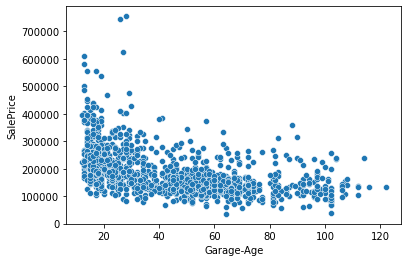

In [192]:
#Regarding missing value for 'Garage-age', let's understand relationship between Garage-Age and SalePrice
sns.scatterplot(data=housing_base_data, x='Garage-Age', y='SalePrice')

In [193]:
housing_base_data[(housing_base_data['Garage-Age'].isna())]['SalePrice'].describe()

count        81.000000
mean     103317.283951
std       32815.023389
min       34900.000000
25%       82500.000000
50%      100000.000000
75%      124000.000000
max      200500.000000
Name: SalePrice, dtype: float64

In [194]:
#let's consider Garage-Age = 110 based on scatter plot
housing_base_data['Garage-Age'] = housing_base_data['Garage-Age'].fillna(110)

In [195]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1195 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [196]:
#let's analyze missing values of feature 'LotFrontage'
housing_base_data['LotFrontage'].describe()

count    1195.000000
mean       70.030126
std        24.289276
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [197]:
housing_base_data[(housing_base_data['LotFrontage'] >= 69)]['SalePrice'].describe()

count       608.000000
mean     206470.087171
std       89966.879336
min       52500.000000
25%      142575.000000
50%      179950.000000
75%      250000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [198]:
housing_base_data[(housing_base_data['LotFrontage'].isna())]['SalePrice'].describe()

count       257.000000
mean     181410.408560
std       58013.807162
min       61000.000000
25%      143250.000000
50%      172000.000000
75%      215000.000000
max      466500.000000
Name: SalePrice, dtype: float64

### Observation
* Based on above, it seems median SalePrice for median and NA of 'LotFrontage' is closer

### Data Handling method
* let's fill median 'LotFrontage' value to all missing values

In [199]:
housing_base_data['LotFrontage'].isna().sum()

257

In [200]:
print(housing_base_data['LotFrontage'].median())

69.0


In [201]:
housing_base_data['LotFrontage'] = housing_base_data['LotFrontage'].fillna(housing_base_data['LotFrontage'].median())


In [202]:
housing_base_data['LotFrontage'].describe()

count    1452.000000
mean       69.847796
std        22.036987
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [203]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSSubClass           1452 non-null   int64   
 1   MSZoning             1452 non-null   category
 2   LotFrontage          1452 non-null   float64 
 3   LotArea              1452 non-null   int64   
 4   Street               1452 non-null   category
 5   LotShape             1452 non-null   category
 6   LandContour          1452 non-null   category
 7   LotConfig            1452 non-null   category
 8   LandSlope            1452 non-null   category
 9   Neighborhood         1452 non-null   category
 10  BldgType             1452 non-null   category
 11  HouseStyle           1452 non-null   category
 12  OverallQual          1452 non-null   category
 13  OverallCond          1452 non-null   category
 14  RoofStyle            1452 non-null   category
 15  RoofMatl             

In [204]:
housing_base_data['LotFrontage'].isna().sum()

0

In [205]:
housing_base_data[(housing_base_data['house-age'].isna())]['SalePrice'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SalePrice, dtype: float64

In [206]:
housing_base_data['house-age'].describe()

count    1452.000000
mean       50.883609
std        30.193761
min        12.000000
25%        22.000000
50%        50.000000
75%        68.000000
max       150.000000
Name: house-age, dtype: float64

In [207]:
housing_base_data[(housing_base_data['house-age'] >= 61)]['SalePrice'].describe()

count       515.000000
mean     136119.223301
std       49125.004401
min       34900.000000
25%      109000.000000
50%      130000.000000
75%      152500.000000
max      475000.000000
Name: SalePrice, dtype: float64

In [208]:
def convert_MSSubClass_to_category(feature_value):
    if (feature_value == 20):
        return '1-STORY 1946 & NEWER ALL STYLES'
    elif(feature_value == 30):
        return '1-STORY 1945 & OLDER'
    elif(feature_value == 40):
        return '1-STORY W/FINISHED ATTIC ALL AGES'
    elif(feature_value == 45):
        return '1-1/2 STORY - UNFINISHED ALL AGES'
    elif(feature_value == 50):
        return '1-1/2 STORY FINISHED ALL AGES'
    elif(feature_value == 60):
        return '2-STORY 1946 & NEWER'
    elif(feature_value == 70):
        return '2-STORY 1945 & OLDER'
    elif (feature_value == 75):
        return '2-1/2 STORY ALL AGES'
    elif (feature_value == 80):
        return 'SPLIT OR MULTI-LEVEL'
    elif (feature_value == 85):
        return 'SPLIT FOYER'
    elif (feature_value == 90):
        return 'DUPLEX - ALL STYLES AND AGES'
    elif (feature_value == 120):
        return '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
    elif (feature_value == 150):
        return '1-1/2 STORY PUD - ALL AGES'
    elif (feature_value == 160):
        return '2-STORY PUD - 1946 & NEWER'
    elif (feature_value == 180):
        return 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
    elif(feature_value == 190):
        return '2 FAMILY CONVERSION - ALL STYLES AND AGES'

In [209]:
housing_base_data['MSSubClass-alt'] = housing_base_data['MSSubClass'].apply(lambda x: convert_MSSubClass_to_category(x))
housing_base_data['MSSubClass-alt'] = housing_base_data['MSSubClass-alt'].astype('category')

In [210]:
#let's drop original feature 'MSSubClass'
housing_base_data = housing_base_data.drop(columns='MSSubClass', axis=1)
housing_base_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging,CentralAir-alt,Garage-Age,MSSubClass-alt
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,...,2,2008,WD,Normal,208500,19,0,1,19.0,2-STORY 1946 & NEWER
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,...,5,2007,WD,Normal,181500,46,0,1,46.0,1-STORY 1946 & NEWER ALL STYLES
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,...,9,2008,WD,Normal,223500,21,1,1,21.0,2-STORY 1946 & NEWER
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,...,2,2006,WD,Abnorml,140000,107,55,1,24.0,2-STORY 1945 & OLDER
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,...,12,2008,WD,Normal,250000,22,0,1,22.0,2-STORY 1946 & NEWER


In [211]:
housing_base_data['MoSold'].astype

<bound method NDFrame.astype of 0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1452, dtype: int64>

In [212]:
#let's create a new feature 'last_sold'
today_date = date.today()
housing_base_data['last_sold'] = (date.today().year - housing_base_data['YrSold'])*12 + (date.today().month - housing_base_data['MoSold'])  #.apply(lambda x: today_date.year - x)
housing_base_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,...,YrSold,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging,CentralAir-alt,Garage-Age,MSSubClass-alt,last_sold
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,...,2008,WD,Normal,208500,19,0,1,19.0,2-STORY 1946 & NEWER,169
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,...,2007,WD,Normal,181500,46,0,1,46.0,1-STORY 1946 & NEWER ALL STYLES,178
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,...,2008,WD,Normal,223500,21,1,1,21.0,2-STORY 1946 & NEWER,162
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,...,2006,WD,Abnorml,140000,107,55,1,24.0,2-STORY 1945 & OLDER,193
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,...,2008,WD,Normal,250000,22,0,1,22.0,2-STORY 1946 & NEWER,159


In [213]:
#let's drop features 'YrSold' and 'MoSold'
housing_base_data.drop(columns=['YrSold', 'MoSold'], inplace=True)

In [214]:
housing_base_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,...,MiscVal,SaleType,SaleCondition,SalePrice,house-age,last-modified-aging,CentralAir-alt,Garage-Age,MSSubClass-alt,last_sold
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,...,0,WD,Normal,208500,19,0,1,19.0,2-STORY 1946 & NEWER,169
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,...,0,WD,Normal,181500,46,0,1,46.0,1-STORY 1946 & NEWER ALL STYLES,178
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,...,0,WD,Normal,223500,21,1,1,21.0,2-STORY 1946 & NEWER,162
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,...,0,WD,Abnorml,140000,107,55,1,24.0,2-STORY 1945 & OLDER,193
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,...,0,WD,Normal,250000,22,0,1,22.0,2-STORY 1946 & NEWER,159


### End of Data Cleaning

## 1.4 let's understand relationship b/w independent features and target variable (viz. SalePrice)

In [215]:
housing_base_data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,house-age,last-modified-aging,CentralAir-alt,Garage-Age,last_sold
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,69.847796,10507.276171,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,346.944215,5.876722,...,3.428375,15.143939,2.774105,43.728650,180615.063361,50.883609,13.659091,0.934573,47.328512,166.896694
std,22.036987,9989.563592,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,436.370724,48.754995,...,29.396943,55.899665,40.287389,497.478278,79285.541485,30.193761,24.526055,0.247363,28.420568,15.782343
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,34900.000000,12.000000,0.000000,0.000000,12.000000,140.000000
25%,60.000000,7538.750000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,129900.000000,22.000000,0.000000,1.000000,21.000000,153.000000
50%,69.000000,9478.500000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,162700.000000,50.000000,0.000000,1.000000,45.000000,166.000000
75%,79.000000,11600.000000,166.000000,706.500000,0.000000,808.000000,1297.250000,1391.000000,728.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,214000.000000,68.000000,20.000000,1.000000,64.000000,179.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,508.000000,480.000000,738.000000,15500.000000,755000.000000,150.000000,123.000000,1.000000,122.000000,194.000000


<AxesSubplot:>

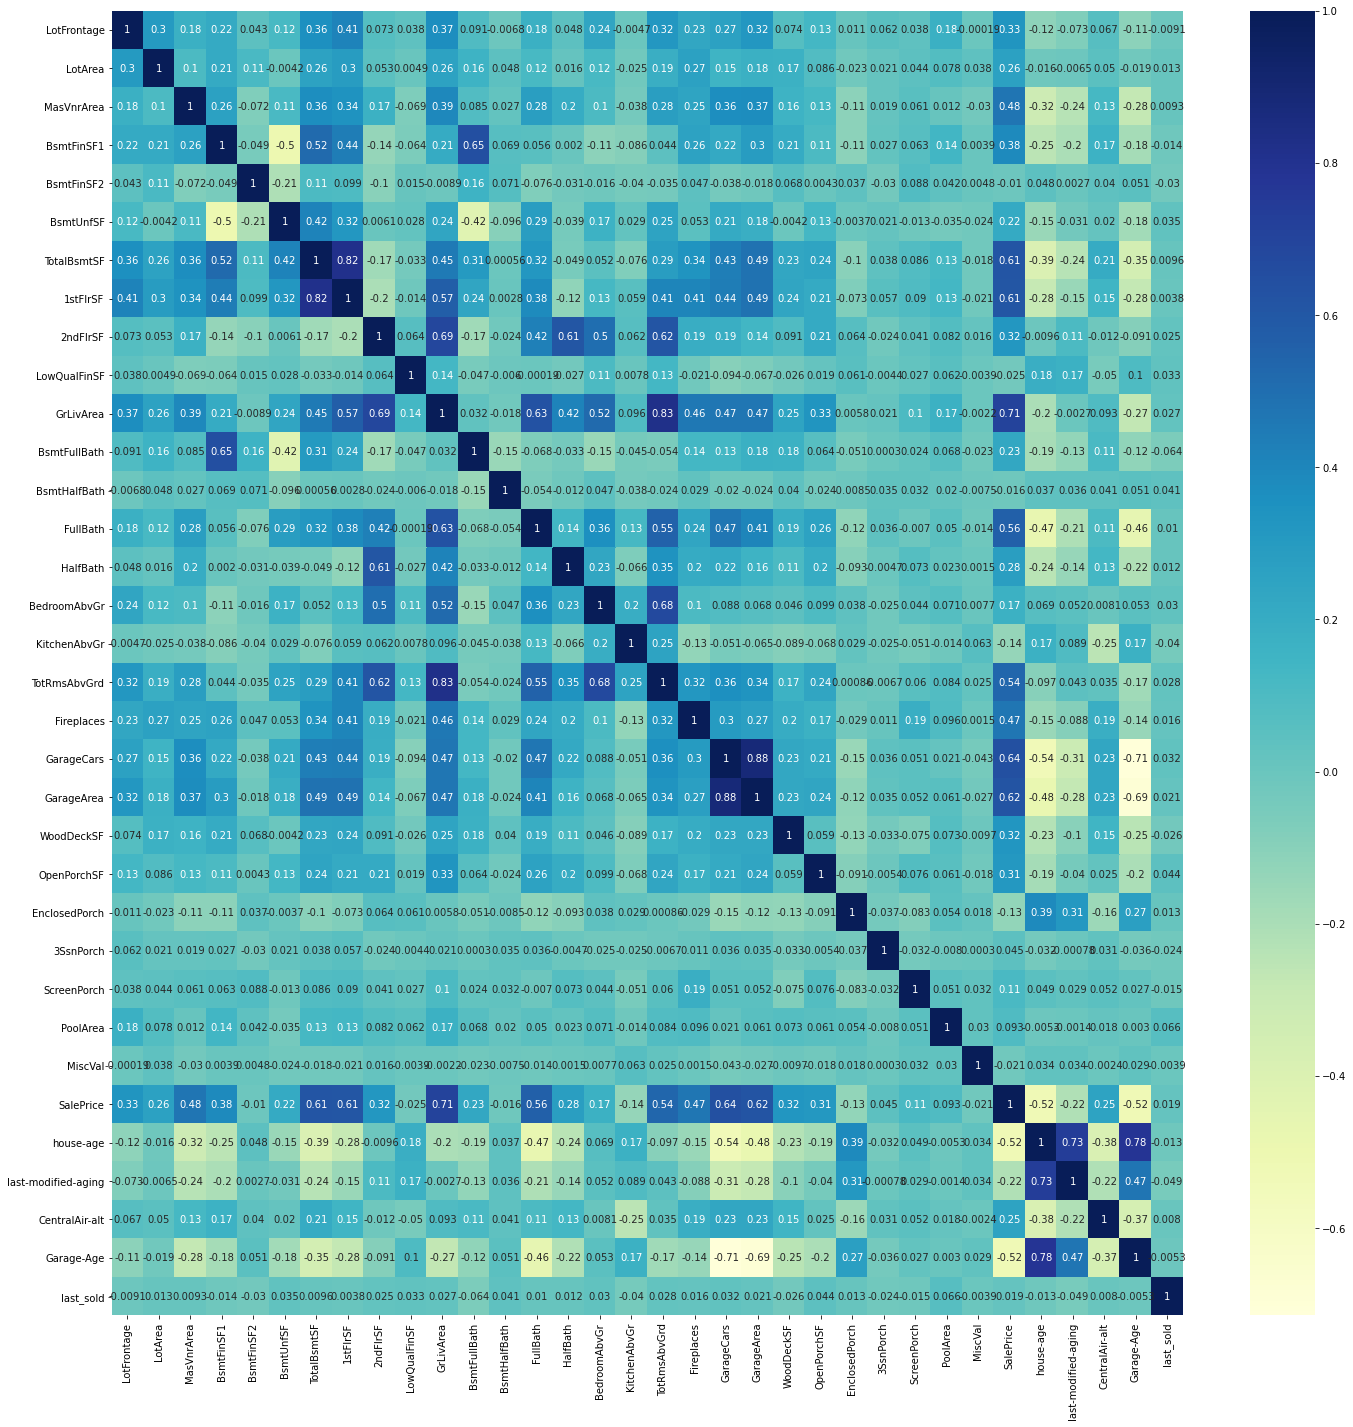

In [216]:
plt.figure(figsize=(24, 24))
sns.heatmap(housing_base_data.corr(), annot=True, cmap='YlGnBu')

In [217]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSZoning             1452 non-null   category
 1   LotFrontage          1452 non-null   float64 
 2   LotArea              1452 non-null   int64   
 3   Street               1452 non-null   category
 4   LotShape             1452 non-null   category
 5   LandContour          1452 non-null   category
 6   LotConfig            1452 non-null   category
 7   LandSlope            1452 non-null   category
 8   Neighborhood         1452 non-null   category
 9   BldgType             1452 non-null   category
 10  HouseStyle           1452 non-null   category
 11  OverallQual          1452 non-null   category
 12  OverallCond          1452 non-null   category
 13  RoofStyle            1452 non-null   category
 14  RoofMatl             1452 non-null   category
 15  Exterior1st          

## 1.5 Create Dummay Variables for Categorical Variables

In [218]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSZoning             1452 non-null   category
 1   LotFrontage          1452 non-null   float64 
 2   LotArea              1452 non-null   int64   
 3   Street               1452 non-null   category
 4   LotShape             1452 non-null   category
 5   LandContour          1452 non-null   category
 6   LotConfig            1452 non-null   category
 7   LandSlope            1452 non-null   category
 8   Neighborhood         1452 non-null   category
 9   BldgType             1452 non-null   category
 10  HouseStyle           1452 non-null   category
 11  OverallQual          1452 non-null   category
 12  OverallCond          1452 non-null   category
 13  RoofStyle            1452 non-null   category
 14  RoofMatl             1452 non-null   category
 15  Exterior1st          

In [219]:
#let's create dummay varibale for feature 'MSZoning'
mszoning = pd.get_dummies(housing_base_data['MSZoning'], prefix='MSZoning', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, mszoning], axis=1)
housing_base_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,...,house-age,last-modified-aging,CentralAir-alt,Garage-Age,MSSubClass-alt,last_sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,...,19,0,1,19.0,2-STORY 1946 & NEWER,169,0,0,1,0
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,...,46,0,1,46.0,1-STORY 1946 & NEWER ALL STYLES,178,0,0,1,0
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,...,21,1,1,21.0,2-STORY 1946 & NEWER,162,0,0,1,0
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,...,107,55,1,24.0,2-STORY 1945 & OLDER,193,0,0,1,0
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,...,22,0,1,22.0,2-STORY 1946 & NEWER,159,0,0,1,0


In [220]:
housing_base_data.drop(columns='MSZoning', axis=1, inplace=True)

In [221]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   LotFrontage          1452 non-null   float64 
 1   LotArea              1452 non-null   int64   
 2   Street               1452 non-null   category
 3   LotShape             1452 non-null   category
 4   LandContour          1452 non-null   category
 5   LotConfig            1452 non-null   category
 6   LandSlope            1452 non-null   category
 7   Neighborhood         1452 non-null   category
 8   BldgType             1452 non-null   category
 9   HouseStyle           1452 non-null   category
 10  OverallQual          1452 non-null   category
 11  OverallCond          1452 non-null   category
 12  RoofStyle            1452 non-null   category
 13  RoofMatl             1452 non-null   category
 14  Exterior1st          1452 non-null   category
 15  Exterior2nd          

In [222]:
#let's create dummies for feature 'Street'
street = pd.get_dummies(housing_base_data['Street'], prefix='Street', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, street], axis=1)
housing_base_data.drop(columns='Street', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,last-modified-aging,CentralAir-alt,Garage-Age,MSSubClass-alt,last_sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,...,0,1,19.0,2-STORY 1946 & NEWER,169,0,0,1,0,1
1,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,6,...,0,1,46.0,1-STORY 1946 & NEWER ALL STYLES,178,0,0,1,0,1
2,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,...,1,1,21.0,2-STORY 1946 & NEWER,162,0,0,1,0,1
3,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,7,...,55,1,24.0,2-STORY 1945 & OLDER,193,0,0,1,0,1
4,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,8,...,0,1,22.0,2-STORY 1946 & NEWER,159,0,0,1,0,1


In [223]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   LotFrontage          1452 non-null   float64 
 1   LotArea              1452 non-null   int64   
 2   LotShape             1452 non-null   category
 3   LandContour          1452 non-null   category
 4   LotConfig            1452 non-null   category
 5   LandSlope            1452 non-null   category
 6   Neighborhood         1452 non-null   category
 7   BldgType             1452 non-null   category
 8   HouseStyle           1452 non-null   category
 9   OverallQual          1452 non-null   category
 10  OverallCond          1452 non-null   category
 11  RoofStyle            1452 non-null   category
 12  RoofMatl             1452 non-null   category
 13  Exterior1st          1452 non-null   category
 14  Exterior2nd          1452 non-null   category
 15  MasVnrType           

In [224]:
#for feature in category_feat_list:
#    feature_dummy = pd.get_dummies(housing_base_data, prefix=feature, prefix_sep='_', drop_first=True)
#    housing_base_data = pd.concat([housing_base_data, feature_dummy], axis=1)
#    housing_base_data.drop(columns=feature, axis=1, inplace=True)

In [225]:
#let's create dummies for feature 'LotShape'
lot_shape = pd.get_dummies(housing_base_data['LotShape'], prefix='LotShape', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, lot_shape], axis=1)
housing_base_data.drop(columns='LotShape', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,MSSubClass-alt,last_sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,65.0,8450,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,5,...,2-STORY 1946 & NEWER,169,0,0,1,0,1,0,0,1
1,80.0,9600,Lvl,FR2,Gtl,Veenker,1Fam,1Story,6,8,...,1-STORY 1946 & NEWER ALL STYLES,178,0,0,1,0,1,0,0,1
2,68.0,11250,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,7,5,...,2-STORY 1946 & NEWER,162,0,0,1,0,1,0,0,0
3,60.0,9550,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,7,5,...,2-STORY 1945 & OLDER,193,0,0,1,0,1,0,0,0
4,84.0,14260,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,8,5,...,2-STORY 1946 & NEWER,159,0,0,1,0,1,0,0,0


In [226]:
#let's create dummies for feature 'LandContour'
land_contour = pd.get_dummies(housing_base_data['LandContour'], prefix='LandContour', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, land_contour], axis=1)
housing_base_data.drop(columns='LandContour', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.0,8450,Inside,Gtl,CollgCr,1Fam,2Story,7,5,Gable,...,0,1,0,1,0,0,1,0,0,1
1,80.0,9600,FR2,Gtl,Veenker,1Fam,1Story,6,8,Gable,...,0,1,0,1,0,0,1,0,0,1
2,68.0,11250,Inside,Gtl,CollgCr,1Fam,2Story,7,5,Gable,...,0,1,0,1,0,0,0,0,0,1
3,60.0,9550,Corner,Gtl,Crawfor,1Fam,2Story,7,5,Gable,...,0,1,0,1,0,0,0,0,0,1
4,84.0,14260,FR2,Gtl,NoRidge,1Fam,2Story,8,5,Gable,...,0,1,0,1,0,0,0,0,0,1


In [227]:
#let's create dummies for feature 'LotConfig'
LotConfig = pd.get_dummies(housing_base_data['LotConfig'], prefix='LotConfig', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, LotConfig], axis=1)
housing_base_data.drop(columns='LotConfig', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,...,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,65.0,8450,Gtl,CollgCr,1Fam,2Story,7,5,Gable,CompShg,...,0,0,1,0,0,1,0,0,0,1
1,80.0,9600,Gtl,Veenker,1Fam,1Story,6,8,Gable,CompShg,...,0,0,1,0,0,1,0,1,0,0
2,68.0,11250,Gtl,CollgCr,1Fam,2Story,7,5,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,1
3,60.0,9550,Gtl,Crawfor,1Fam,2Story,7,5,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,Gtl,NoRidge,1Fam,2Story,8,5,Gable,CompShg,...,0,0,0,0,0,1,0,1,0,0


In [228]:
#let's create dummies for feature 'LandSlope'
LandSlope = pd.get_dummies(housing_base_data['LandSlope'], prefix='LandSlope', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, LandSlope], axis=1)
housing_base_data.drop(columns='LandSlope', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,...,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev
0,65.0,8450,CollgCr,1Fam,2Story,7,5,Gable,CompShg,VinylSd,...,1,0,0,1,0,0,0,1,0,0
1,80.0,9600,Veenker,1Fam,1Story,6,8,Gable,CompShg,MetalSd,...,1,0,0,1,0,1,0,0,0,0
2,68.0,11250,CollgCr,1Fam,2Story,7,5,Gable,CompShg,VinylSd,...,0,0,0,1,0,0,0,1,0,0
3,60.0,9550,Crawfor,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,NoRidge,1Fam,2Story,8,5,Gable,CompShg,VinylSd,...,0,0,0,1,0,1,0,0,0,0


In [229]:
#let's create dummies for feature 'Neighborhood'
Neighborhood = pd.get_dummies(housing_base_data['Neighborhood'], prefix='Neighborhood', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, Neighborhood], axis=1)
housing_base_data.drop(columns='Neighborhood', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,65.0,8450,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,...,1,0,0,0,0,0,0,0,0,0


In [230]:
#let's create dummies for feature 'BldgType'
BldgType = pd.get_dummies(housing_base_data['BldgType'], prefix='BldgType', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, BldgType], axis=1)
housing_base_data.drop(columns='BldgType', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,65.0,8450,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,BrkCmn,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,BrkCmn,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,0,0,0


In [231]:
#let's create dummies for feature 'HouseStyle'
HouseStyle = pd.get_dummies(housing_base_data['HouseStyle'], prefix='HouseStyle', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, HouseStyle], axis=1)
housing_base_data.drop(columns='HouseStyle', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,Gable,CompShg,MetalSd,MetalSd,BrkCmn,0.0,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,Gable,CompShg,Wd Sdng,Wd Shng,BrkCmn,0.0,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,...,0,0,0,0,0,0,0,1,0,0


In [232]:
#let's create dummies for feature 'OverallQual'
OverallQual = pd.get_dummies(housing_base_data['OverallQual'], prefix='OverallQual', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, OverallQual], axis=1)
housing_base_data.drop(columns='OverallQual', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,65.0,8450,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,0,0,0,0,0,0,1,0,0,0
1,80.0,9600,8,Gable,CompShg,MetalSd,MetalSd,BrkCmn,0.0,TA,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,0,0,0,0,0,0,1,0,0,0
3,60.0,9550,5,Gable,CompShg,Wd Sdng,Wd Shng,BrkCmn,0.0,TA,...,0,0,0,0,0,0,1,0,0,0
4,84.0,14260,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,0,0,0,0,0,0,0,1,0,0


In [233]:
#let's create dummies for feature 'OverallCond'
OverallCond = pd.get_dummies(housing_base_data['OverallCond'], prefix='OverallCond', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, OverallCond], axis=1)
housing_base_data.drop(columns='OverallCond', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,...,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,65.0,8450,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,Gable,CompShg,MetalSd,MetalSd,BrkCmn,0.0,TA,TA,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,Gable,CompShg,Wd Sdng,Wd Shng,BrkCmn,0.0,TA,TA,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,0,0,0,0,0,1,0,0,0,0


In [234]:
#let's create dummies for feature 'RoofStyle'
RoofStyle = pd.get_dummies(housing_base_data['RoofStyle'], prefix='RoofStyle', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, RoofStyle], axis=1)
housing_base_data.drop(columns='RoofStyle', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,...,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,65.0,8450,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,...,1,0,0,0,0,1,0,0,0,0
1,80.0,9600,CompShg,MetalSd,MetalSd,BrkCmn,0.0,TA,TA,CBlock,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,...,1,0,0,0,0,1,0,0,0,0
3,60.0,9550,CompShg,Wd Sdng,Wd Shng,BrkCmn,0.0,TA,TA,BrkTil,...,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,...,1,0,0,0,0,1,0,0,0,0


In [235]:
#let's create dummies for feature 'RoofMatl'
RoofMatl = pd.get_dummies(housing_base_data['RoofMatl'], prefix='RoofMatl', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, RoofMatl], axis=1)
housing_base_data.drop(columns='RoofMatl', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,...,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,65.0,8450,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,...,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,MetalSd,MetalSd,BrkCmn,0.0,TA,TA,CBlock,Gd,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,...,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,Wd Sdng,Wd Shng,BrkCmn,0.0,TA,TA,BrkTil,TA,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,...,0,0,0,1,0,0,0,0,0,0


In [236]:
#let's create dummies for feature 'Exterior1st'
Exterior1st = pd.get_dummies(housing_base_data['Exterior1st'], prefix='Exterior1st', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, Exterior1st], axis=1)
housing_base_data.drop(columns='Exterior1st', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,65.0,8450,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,MetalSd,BrkCmn,0.0,TA,TA,CBlock,Gd,TA,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,Wd Shng,BrkCmn,0.0,TA,TA,BrkTil,TA,Gd,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,...,0,0,0,0,0,0,0,1,0,0


In [237]:
#let's create dummies for feature 'Exterior2nd'
Exterior2nd = pd.get_dummies(housing_base_data['Exterior2nd'], prefix='Exterior2nd', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, Exterior2nd], axis=1)
housing_base_data.drop(columns='Exterior2nd', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,65.0,8450,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,BrkCmn,0.0,TA,TA,CBlock,Gd,TA,Gd,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,BrkCmn,0.0,TA,TA,BrkTil,TA,Gd,No,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,...,0,0,0,0,0,0,0,1,0,0


In [238]:
#let's create dummies for feature 'ExterQual'
ExterQual = pd.get_dummies(housing_base_data['ExterQual'], prefix='ExterQual', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, ExterQual], axis=1)
housing_base_data.drop(columns='ExterQual', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,65.0,8450,BrkFace,196.0,TA,PConc,Gd,TA,No,GLQ,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,BrkCmn,0.0,TA,CBlock,Gd,TA,Gd,ALQ,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,BrkFace,162.0,TA,PConc,Gd,TA,Mn,GLQ,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,BrkCmn,0.0,TA,BrkTil,TA,Gd,No,ALQ,...,0,0,0,0,0,0,1,0,0,1
4,84.0,14260,BrkFace,350.0,TA,PConc,Gd,TA,Av,GLQ,...,0,0,0,0,1,0,0,0,1,0


In [239]:
#let's create dummies for feature 'MasVnrType'
MasVnrType = pd.get_dummies(housing_base_data['MasVnrType'], prefix='MasVnrType', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, MasVnrType], axis=1)
housing_base_data.drop(columns='MasVnrType', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,MasVnrType_BrkFace,MasVnrType_Stone
0,65.0,8450,196.0,TA,PConc,Gd,TA,No,GLQ,706,...,0,0,1,0,0,0,1,0,1,0
1,80.0,9600,0.0,TA,CBlock,Gd,TA,Gd,ALQ,978,...,0,0,0,0,0,0,0,1,0,0
2,68.0,11250,162.0,TA,PConc,Gd,TA,Mn,GLQ,486,...,0,0,1,0,0,0,1,0,1,0
3,60.0,9550,0.0,TA,BrkTil,TA,Gd,No,ALQ,216,...,0,0,0,0,1,0,0,1,0,0
4,84.0,14260,350.0,TA,PConc,Gd,TA,Av,GLQ,655,...,0,0,1,0,0,0,1,0,1,0


In [240]:
#let's create dummies for feature 'ExterCond'
ExterCond = pd.get_dummies(housing_base_data['ExterCond'], prefix='ExterCond', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, ExterCond], axis=1)
housing_base_data.drop(columns='ExterCond', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,MasVnrType_BrkFace,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,65.0,8450,196.0,PConc,Gd,TA,No,GLQ,706,Unf,...,0,0,1,0,1,0,0,0,0,1
1,80.0,9600,0.0,CBlock,Gd,TA,Gd,ALQ,978,Unf,...,0,0,0,1,0,0,0,0,0,1
2,68.0,11250,162.0,PConc,Gd,TA,Mn,GLQ,486,Unf,...,0,0,1,0,1,0,0,0,0,1
3,60.0,9550,0.0,BrkTil,TA,Gd,No,ALQ,216,Unf,...,1,0,0,1,0,0,0,0,0,1
4,84.0,14260,350.0,PConc,Gd,TA,Av,GLQ,655,Unf,...,0,0,1,0,1,0,0,0,0,1


In [241]:
#let's create dummies for feature 'Foundation'
Foundation = pd.get_dummies(housing_base_data['Foundation'], prefix='Foundation', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, Foundation], axis=1)
housing_base_data.drop(columns='Foundation', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,...,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,65.0,8450,196.0,Gd,TA,No,GLQ,706,Unf,0,...,0,0,0,0,1,0,1,0,0,0
1,80.0,9600,0.0,Gd,TA,Gd,ALQ,978,Unf,0,...,0,0,0,0,1,1,0,0,0,0
2,68.0,11250,162.0,Gd,TA,Mn,GLQ,486,Unf,0,...,0,0,0,0,1,0,1,0,0,0
3,60.0,9550,0.0,TA,Gd,No,ALQ,216,Unf,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,Gd,TA,Av,GLQ,655,Unf,0,...,0,0,0,0,1,0,1,0,0,0


In [242]:
#let's create dummies for feature 'BsmtQual'
BsmtQual = pd.get_dummies(housing_base_data['BsmtQual'], prefix='BsmtQual', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, BsmtQual], axis=1)
housing_base_data.drop(columns='BsmtQual', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_No-Basement
0,65.0,8450,196.0,TA,No,GLQ,706,Unf,0,150,...,1,0,1,0,0,0,0,1,0,0
1,80.0,9600,0.0,TA,Gd,ALQ,978,Unf,0,284,...,1,1,0,0,0,0,0,1,0,0
2,68.0,11250,162.0,TA,Mn,GLQ,486,Unf,0,434,...,1,0,1,0,0,0,0,1,0,0
3,60.0,9550,0.0,Gd,No,ALQ,216,Unf,0,540,...,1,0,0,0,0,0,0,0,1,0
4,84.0,14260,350.0,TA,Av,GLQ,655,Unf,0,490,...,1,0,1,0,0,0,0,1,0,0


In [243]:
#let's create dummies for feature 'BsmtCond'
BsmtCond = pd.get_dummies(housing_base_data['BsmtCond'], prefix='BsmtCond', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, BsmtCond], axis=1)
housing_base_data.drop(columns='BsmtCond', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_No-Basement,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_No-Basement
0,65.0,8450,196.0,No,GLQ,706,Unf,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,Gd,ALQ,978,Unf,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,Mn,GLQ,486,Unf,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,No,ALQ,216,Unf,0,540,756,...,0,0,0,0,1,0,1,0,0,0
4,84.0,14260,350.0,Av,GLQ,655,Unf,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


In [244]:
#let's create dummies for feature 'BsmtExposure'
BsmtExposure = pd.get_dummies(housing_base_data['BsmtExposure'], prefix='BsmtExposure', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, BsmtExposure], axis=1)
housing_base_data.drop(columns='BsmtExposure', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,BsmtQual_TA,BsmtQual_No-Basement,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_No-Basement,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No-Basement
0,65.0,8450,196.0,GLQ,706,Unf,0,150,856,GasA,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,ALQ,978,Unf,0,284,1262,GasA,...,0,0,0,0,1,0,1,0,0,0
2,68.0,11250,162.0,GLQ,486,Unf,0,434,920,GasA,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,0.0,ALQ,216,Unf,0,540,756,GasA,...,1,0,1,0,0,0,0,0,1,0
4,84.0,14260,350.0,GLQ,655,Unf,0,490,1145,GasA,...,0,0,0,0,1,0,0,0,0,0


In [245]:

#let's create dummies for feature 'BsmtFinType1'
BsmtFinType1 = pd.get_dummies(housing_base_data['BsmtFinType1'], prefix='BsmtFinType1', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, BsmtFinType1], axis=1)
housing_base_data.drop(columns='BsmtFinType1', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No-Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_No-Basement
0,65.0,8450,196.0,706,Unf,0,150,856,GasA,Ex,...,0,0,1,0,0,1,0,0,0,0
1,80.0,9600,0.0,978,Unf,0,284,1262,GasA,Ex,...,1,0,0,0,0,0,0,0,0,0
2,68.0,11250,162.0,486,Unf,0,434,920,GasA,Ex,...,0,1,0,0,0,1,0,0,0,0
3,60.0,9550,0.0,216,Unf,0,540,756,GasA,Gd,...,0,0,1,0,0,0,0,0,0,0
4,84.0,14260,350.0,655,Unf,0,490,1145,GasA,Ex,...,0,0,0,0,0,1,0,0,0,0


In [246]:
#let's create dummies for feature 'BsmtFinType2'
BsmtFinType2 = pd.get_dummies(housing_base_data['BsmtFinType2'], prefix='BsmtFinType2', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, BsmtFinType2], axis=1)
housing_base_data.drop(columns='BsmtFinType2', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,...,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_No-Basement,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_No-Basement
0,65.0,8450,196.0,706,0,150,856,GasA,Ex,SBrkr,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,GasA,Ex,SBrkr,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,GasA,Ex,SBrkr,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,GasA,Gd,SBrkr,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,GasA,Ex,SBrkr,...,0,0,0,0,0,0,0,0,1,0


In [247]:
#let's create dummies for feature 'Heating'
Heating = pd.get_dummies(housing_base_data['Heating'], prefix='Heating', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, Heating], axis=1)
housing_base_data.drop(columns='Heating', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,...,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_No-Basement,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,65.0,8450,196.0,706,0,150,856,Ex,SBrkr,856,...,0,0,0,1,0,1,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,Ex,SBrkr,1262,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,Ex,SBrkr,920,...,0,0,0,1,0,1,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,Gd,SBrkr,961,...,0,0,0,1,0,1,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,Ex,SBrkr,1145,...,0,0,0,1,0,1,0,0,0,0


In [248]:
#let's create dummies for feature 'HeatingQC'
HeatingQC = pd.get_dummies(housing_base_data['HeatingQC'], prefix='HeatingQC', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, HeatingQC], axis=1)
housing_base_data.drop(columns='HeatingQC', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,...,BsmtFinType2_No-Basement,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,65.0,8450,196.0,706,0,150,856,SBrkr,856,854,...,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,SBrkr,1262,0,...,0,1,0,0,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,SBrkr,920,866,...,0,1,0,0,0,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,SBrkr,961,756,...,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,350.0,655,0,490,1145,SBrkr,1145,1053,...,0,1,0,0,0,0,0,0,0,0


In [249]:
#let's create dummies for feature 'Electrical'
Electrical = pd.get_dummies(housing_base_data['Electrical'], prefix='Electrical', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, Electrical], axis=1)
housing_base_data.drop(columns='Electrical', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,0,0,0,0,1
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,1,0,0,0,0,0,1
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,0,0,0,0,1


In [250]:
#let's create dummies for feature 'KitchenQual'
KitchenQual = pd.get_dummies(housing_base_data['KitchenQual'], prefix='KitchenQual', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, KitchenQual], axis=1)
housing_base_data.drop(columns='KitchenQual', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,0,1,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,0,1,0,0,1
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,0,1,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,0,0,0,0,1,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,0,1,0,1,0


In [251]:
#let's create dummies for feature 'Functional'
Functional = pd.get_dummies(housing_base_data['Functional'], prefix='Functional', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, Functional], axis=1)
housing_base_data.drop(columns='Functional', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,1,0,1,0,0,0,0,0,0,1
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,0,0,1,0,0,0,0,0,1
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,0,1,0,0,0,0,0,0,1
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,1,0,0,0,0,0,0,1
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,0,1,0,0,0,0,0,0,1


In [252]:
#let's create dummies for feature 'FireplaceQu'
FireplaceQu = pd.get_dummies(housing_base_data['FireplaceQu'], prefix='FireplaceQu', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, FireplaceQu], axis=1)
housing_base_data.drop(columns='FireplaceQu', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_No-Fireplace
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [253]:
#let's create dummies for feature 'GarageType'
GarageType = pd.get_dummies(housing_base_data['GarageType'], prefix='GarageType', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, GarageType], axis=1)
housing_base_data.drop(columns='GarageType', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_No-Fireplace,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No-Garage
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,1,1,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,1,0,1,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,1,0,1,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,0,0,0,0,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,1,0,1,0,0,0,0,0


In [254]:
#let's create dummies for feature 'GarageFinish'
GarageFinish = pd.get_dummies(housing_base_data['GarageFinish'], prefix='GarageFinish', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, GarageFinish], axis=1)
housing_base_data.drop(columns='GarageFinish', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_No-Fireplace,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No-Garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_No-Garage
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,1,1,0,0,0,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,1,0,0,0,0,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,1,0,0,0,0,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,0,1,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,1,0,0,0,0,0,1,0,0


In [255]:
#let's create dummies for feature 'GarageQual'
GarageQual = pd.get_dummies(housing_base_data['GarageQual'], prefix='GarageQual', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, GarageQual], axis=1)
housing_base_data.drop(columns='GarageQual', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Detchd,GarageType_No-Garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_No-Garage,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_No-Garage
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,1,0,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,1,0,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,1,0,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,0,1,0,0,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,1,0,0,0,0,0,1,0


In [256]:
#let's create dummies for feature 'GarageCond'
GarageCond = pd.get_dummies(housing_base_data['GarageCond'], prefix='GarageCond', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, GarageCond], axis=1)
housing_base_data.drop(columns='GarageCond', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_No-Garage,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_No-Garage
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0


In [257]:
#let's create dummies for feature 'PavedDrive'
PavedDrive = pd.get_dummies(housing_base_data['PavedDrive'], prefix='PavedDrive', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, PavedDrive], axis=1)
housing_base_data.drop(columns='PavedDrive', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageQual_Po,GarageQual_TA,GarageQual_No-Garage,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_No-Garage,PavedDrive_P,PavedDrive_Y
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,1,0,0,0,0,1,0,0,1
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,1,0,0,0,0,1,0,0,1
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,1,0,0,0,0,1,0,0,1
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,1
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,1,0,0,0,0,1,0,0,1


In [258]:
#let's create dummies for feature 'SaleType'
SaleType = pd.get_dummies(housing_base_data['SaleType'], prefix='SaleType', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, SaleType], axis=1)
housing_base_data.drop(columns='SaleType', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,1,0,0,0,0,0,0,0,1
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,1,0,0,0,0,0,0,0,1
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,1,0,0,0,0,0,0,0,1
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,0,0,0,1
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,1,0,0,0,0,0,0,0,1


In [259]:
#let's create dummies for feature 'SaleCondition'
SaleCondition = pd.get_dummies(housing_base_data['SaleCondition'], prefix='SaleCondition', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, SaleCondition], axis=1)
housing_base_data.drop(columns='SaleCondition', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [260]:
#let's create dummies for feature 'MSSubClass-alt'
MSSubClass_alt = pd.get_dummies(housing_base_data['MSSubClass-alt'], prefix='MSSubClass-alt', prefix_sep='_', drop_first=True)
housing_base_data = pd.concat([housing_base_data, MSSubClass_alt], axis=1)
housing_base_data.drop(columns='MSSubClass-alt', axis=1, inplace=True)
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,MSSubClass-alt_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass-alt_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass-alt_2-1/2 STORY ALL AGES,MSSubClass-alt_2-STORY 1945 & OLDER,MSSubClass-alt_2-STORY 1946 & NEWER,MSSubClass-alt_2-STORY PUD - 1946 & NEWER,MSSubClass-alt_DUPLEX - ALL STYLES AND AGES,MSSubClass-alt_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass-alt_SPLIT FOYER,MSSubClass-alt_SPLIT OR MULTI-LEVEL
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,0,0


In [261]:
housing_base_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,MSSubClass-alt_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass-alt_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass-alt_2-1/2 STORY ALL AGES,MSSubClass-alt_2-STORY 1945 & OLDER,MSSubClass-alt_2-STORY 1946 & NEWER,MSSubClass-alt_2-STORY PUD - 1946 & NEWER,MSSubClass-alt_DUPLEX - ALL STYLES AND AGES,MSSubClass-alt_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass-alt_SPLIT FOYER,MSSubClass-alt_SPLIT OR MULTI-LEVEL
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,0,0


In [262]:
housing_base_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Columns: 257 entries, LotFrontage to MSSubClass-alt_SPLIT OR MULTI-LEVEL
dtypes: float64(3), int64(31), uint8(223)
memory usage: 713.2 KB


# Step 2: Model Building and Evaluation

## Qualitative Goals: 

* Model parameters are tuned using correct principles, and the approach is explained clearly. Both the technical and business aspects are considered while building the model.

 

 

* Correct variable selection techniques are used. A reasonable number of different models are attempted, and the best one is chosen based on key performance metrics.

 

 

* Model evaluation is done using the correct principles, and appropriate evaluation metrics are chosen.

 

 

* The results are on par with the best possible model on the data set.

 


## Step 2.1: Let's split the data as train & test

In [263]:
#let's create split in a way where rows are consistent everytime
df_train, df_test = train_test_split(housing_base_data, train_size=0.7, test_size=0.3, random_state=100)

## Step 2.2: Let's apply scaling to Continuous features

In [264]:
scaler = MinMaxScaler()

In [265]:
cont_feature_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',#                    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                    'house-age', 'last-modified-aging', 'CentralAir-alt', 'Garage-Age', 'last_sold', 'SalePrice']

In [266]:
df_train[cont_feature_list] = scaler.fit_transform(df_train[cont_feature_list])

In [267]:
df_train[cont_feature_list].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,house-age,last-modified-aging,CentralAir-alt,Garage-Age,last_sold,SalePrice
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,...,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,0.167114,0.043427,0.062932,0.191227,0.041318,0.244763,0.327578,0.257708,0.167129,0.010357,...,0.008329,0.031559,0.003393,0.013235,0.278144,0.110412,0.937008,0.317994,0.498250,0.204393
std,0.075455,0.052558,0.111041,0.194018,0.141154,0.190016,0.131825,0.137139,0.209275,0.087133,...,0.066085,0.119364,0.054254,0.083045,0.217536,0.203038,0.243068,0.255828,0.294896,0.109574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028738,0.000000,0.000000,0.000000,0.096211,0.247583,0.158871,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.072464,0.000000,1.000000,0.081818,0.240741,0.133045
50%,0.164384,0.037818,0.000000,0.161283,0.000000,0.211045,0.306613,0.227778,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.268116,0.000000,1.000000,0.300000,0.481481,0.180397
75%,0.196062,0.047599,0.101406,0.309956,0.000000,0.347282,0.398862,0.340950,0.352542,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.405797,0.146341,1.000000,0.472727,0.726852,0.251503
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 2.3 Create a Linear Regression Model

In [268]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [269]:
#create linear regression instance
lr = linear_model.LinearRegression()

In [270]:
lr.fit(X_train, y_train)

LinearRegression()

In [271]:
print('intercept', lr.intercept_)
print('coeff', lr.coef_)

intercept -0.00489638082537322
coeff [ 2.51695061e-02  1.28563113e-01  1.37932956e-02  5.61522796e-02
  6.41467651e-03  3.16826402e-02  6.49093066e-02  5.26460255e-02
  9.65554168e-02 -7.90031009e-03  8.07457968e-02  2.76699047e-02
 -3.25464379e-03  2.62734371e-02  8.47636395e-03 -3.59368971e-03
 -2.36148386e-02  4.06253497e-03  1.58359253e-02  9.05053983e-03
  1.26602524e-05  1.65865345e-02 -1.98775122e-02  1.43315731e-02
  5.42268921e-02  8.33722491e-03  9.85099855e-02 -8.31447258e-03
 -6.18922576e-02  1.62036979e-02 -1.17902841e-03 -4.34543022e-03
 -7.93951660e-04  7.79133163e-02  5.66733798e-02  5.94533950e-02
  5.51086825e-02  1.43498394e-02  8.96101556e-03  2.09524130e-02
  9.64805545e-04  1.67001975e-02 -2.52117232e-04  1.85414366e-02
  1.19816279e-02 -8.86282969e-03 -4.00284728e-02 -1.44167185e-03
  1.35823922e-02 -1.64722399e-02 -1.97037391e-03  1.90159372e-02
  9.55563043e-03  7.01689206e-03  1.95705978e-03  4.35771953e-02
 -1.82159130e-02  1.22926801e-03  6.06113179e-03 -3.9

In [318]:
print(len(lr.coef_))

256


In [272]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([0.31200706, 0.06270887, 0.11977153, ..., 0.21933182, 0.11433444,
       0.19062561])

In [273]:
df_test[cont_feature_list] = scaler.transform(df_test[cont_feature_list])

In [274]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [275]:
y_test_pred = lr.predict(X_test)

In [276]:
metric = []

In [277]:
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

0.9210254026983862


In [278]:
r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

0.769594078183792


In [279]:
rss_train_lr = np.sum(np.square(y_train - y_train_pred))
print(rss_train_lr)
metric.append(rss_train_lr)

0.9624366158307595


In [280]:
rss_test_lr = np.sum(np.square(y_test - y_test_pred))
print(rss_test_lr)
metric.append(rss_test_lr)

1.3594390920232238


In [281]:
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr)

0.0009472801336916924


In [282]:
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr)

0.0031179795688606048


### Observation
* Performance of model is GOOD on training set but POOR on test set

### Inference
* Model seems to have overfit 

## Step 2.4 Create a Ridge Regression Model

In [283]:
#list of alphas to tune
params = {'alpha':[0.001, 0.001,.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0., 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
                  7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [284]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [285]:
ridge = Ridge()

In [286]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose=1)

In [287]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.0, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [288]:
#let's print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [289]:
#Let's fit Ridge Model for alpha=4.0
alpha = 4.0
ridge = Ridge(alpha=alpha)

In [290]:
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.16874394e-02  2.86887010e-02  2.13102072e-02  4.61438253e-02
  9.84458951e-03  2.19849066e-02  5.19861906e-02  4.68757527e-02
  5.08175720e-02 -8.59139161e-03  5.45769395e-02  2.20289564e-02
 -3.12559348e-03  3.12565774e-02  1.14333803e-02 -2.96950783e-03
 -2.61472663e-02  7.13938655e-03  1.75206076e-02  9.83234784e-03
  2.11133320e-05  1.87737452e-02 -7.37713713e-03  6.47879573e-03
  2.15546776e-02  5.62641439e-03  4.16412968e-02  6.85010129e-04
 -2.46493262e-02  1.24455551e-02  7.33545201e-03 -8.77204250e-05
 -6.18805242e-04  2.04606269e-02  5.72184039e-03  7.64613004e-03
  5.12913192e-03  1.09000872e-02  9.63043893e-03  1.58493943e-02
 -6.25256819e-04  1.20267760e-02  1.14912679e-04  1.11012161e-02
  1.31570101e-02 -9.29224040e-03 -1.47314273e-02 -2.20734883e-03
  6.05721459e-03  7.15623298e-03 -2.87382740e-03  2.92192766e-03
 -1.27843300e-03  6.02347746e-04 -5.76863084e-03  3.24384337e-02
 -2.08240405e-02 -7.38146620e-03 -1.17657152e-02 -1.47100587e-02
 -1.72056993e-02 -1.39484

In [291]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [292]:
metric_ridge = []
r2_train_ridge = r2_score(y_train, y_train_pred)
print(r2_train_ridge)
metric_ridge.append(r2_train_ridge)

0.9124283252564652


In [293]:
r2_test_ridge = r2_score(y_test, y_test_pred)
print(r2_test_ridge)
metric_ridge.append(r2_test_ridge)

0.8011978581907896


In [294]:
rss_train_ridge = np.sum(np.square(y_train - y_train_pred))
print(rss_train_ridge)
metric_ridge.append(rss_train_ridge)

1.0672062810388936


In [295]:
rss_test_ridge = np.sum(np.square(y_test - y_test_pred))
print(rss_test_ridge)
metric_ridge.append(rss_test_ridge)

1.1729707336644228


In [296]:
mse_train_ridge = mean_squared_error(y_train, y_train_pred)
print(mse_train_ridge)
metric_ridge.append(mse_train_ridge)

0.001050399882912297


In [297]:
mse_test_ridge = mean_squared_error(y_test, y_test_pred)
print(mse_test_ridge)
metric_ridge.append(mse_test_ridge)

0.0026902998478541807


## Step 2.5 Create a Lasso Regression Model

In [298]:
from sklearn.linear_model import Lasso

In [299]:
lasso = Lasso()

In [300]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose=1)

In [301]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.0, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [302]:
print(model_cv.best_params_)

{'alpha': 0.0}


In [303]:
#Fitt Lasso model for alpha=0.0
alpha = 0.0

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0)

In [304]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [305]:
metric_lasso = []

In [306]:
r2_train_lasso = r2_score(y_train, y_train_pred)
print(r2_train_lasso)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_test_pred)
print(r2_test_lasso)
metric_lasso.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train - y_train_pred))
print(rss_train_lasso)
metric_lasso.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_test_pred))
print(rss_test_lasso)
metric_lasso.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_train_pred)
print(mse_train_lasso)
metric_lasso.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred)
print(mse_test_lasso)
metric_lasso.append(mse_test_lasso)

0.9210199470406345
0.7704435250287107
0.9625031020803002
1.3544271928564156
0.0009473455729136813
0.0031064843872853566


# Step 3: Compare the metrics and decide best model

In [307]:
#let's create a table including all metrics
lr_table = {'Metric':['r2 score (train)', 'r2 score (test)', 'rss(train)', 'rss(test)', 'mse(train)', 'mse(test)'], 
              'Linear Regression': metric
              }
lr_metric = pd.DataFrame(lr_table, columns=['Metric', 'Linear Regression'])

rg_metric = pd.Series(metric_ridge, name='Ridge Regression')
ls_metric = pd.Series(metric_lasso, name= 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,r2 score (train),0.921025,0.912428,0.921020
1,r2 score (test),0.769594,0.801198,0.770444
2,rss(train),0.962437,1.067206,0.962503
3,rss(test),1.359439,1.172971,1.354427
4,mse(train),0.000947,0.001050,0.000947
5,mse(test),0.003118,0.002690,0.003106


# Conclusion
* <b> Ridge Regression model perform better for test data compared to Linear Regression and Lasso Regressin mode</b>

## Let's observe the change in the coefficients after regularization

In [330]:
betas = pd.DataFrame(index=X_train.columns)

In [331]:
betas.rows = X_train.columns

In [332]:
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, LotFrontage to MSSubClass-alt_SPLIT OR MULTI-LEVEL
Empty DataFrame

In [333]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [334]:
pd.set_option('display.max_rows', None)
betas.head(256)

,Linear,Ridge,Lasso
LotFrontage,2.516951e-02,0.021687,0.025262
LotArea,1.285631e-01,0.028689,0.128702
MasVnrArea,1.379330e-02,0.021310,0.013665
BsmtFinSF1,5.615228e-02,0.046144,0.071769
BsmtFinSF2,6.414677e-03,0.009845,0.014042
BsmtUnfSF,3.168264e-02,0.021985,0.047779
TotalBsmtSF,6.490931e-02,0.051986,0.042933
1stFlrSF,5.264603e-02,0.046876,0.082064
2ndFlrSF,9.655542e-02,0.050818,0.118262
LowQualFinSF,-7.900310e-03,-0.008591,-0.002690


## Ridge model with alpha = 2*4.0 = 8.0

In [335]:
alpha = 8.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=8.0)

In [336]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [337]:
pd.set_option('display.max_rows', None)
betas.head(256)

,Linear,Ridge,Lasso
LotFrontage,2.516951e-02,0.016424,0.025262
LotArea,1.285631e-01,0.019309,0.128702
MasVnrArea,1.379330e-02,0.020737,0.013665
BsmtFinSF1,5.615228e-02,0.041055,0.071769
BsmtFinSF2,6.414677e-03,0.008028,0.014042
BsmtUnfSF,3.168264e-02,0.018339,0.047779
TotalBsmtSF,6.490931e-02,0.045108,0.042933
1stFlrSF,5.264603e-02,0.040382,0.082064
2ndFlrSF,9.655542e-02,0.038219,0.118262
LowQualFinSF,-7.900310e-03,-0.006872,-0.002690


In [338]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [339]:
r2_train_ridge2 = r2_score(y_train, y_train_pred)
print(r2_train_ridge2)

r2_test_ridge2 = r2_score(y_test, y_test_pred)
print(r2_test_ridge2)


rss_train_ridge2 = np.sum(np.square(y_train - y_train_pred))
print(rss_train_ridge2)

rss_test_ridge2 = np.sum(np.square(y_test - y_test_pred))
print(rss_test_ridge2)

mse_train_ridge2 = mean_squared_error(y_train, y_train_pred)
print(mse_train_ridge2)


mse_test_ridge2 = mean_squared_error(y_test, y_test_pred)
print(mse_test_ridge2)

0.9057719769516087
0.805828157434608
1.1483249388757983
1.145651080809174
0.0011302410815706677
0.0026276400935990227
